In [1]:
import matplotlib.pyplot as plt
import pandas as pd
#from pandas.tools.plotting import scatter_matrix
import pylab as pl
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
import os
%matplotlib inline

In [2]:
data_frame = pd.read_csv("autos.csv",encoding="latin-1")

In [3]:
data_frame.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data_frame.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
missing_values = data_frame.isnull().sum()
missing_values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
cat_val = ["seller","offerType","abtest","gearbox","fuelType","notRepairedDamage","nrOfPictures"]

for col in cat_val:
    print ([col]," : ",data_frame[col].unique())

['seller']  :  ['privat' 'gewerblich']
['offerType']  :  ['Angebot' 'Gesuch']
['abtest']  :  ['test' 'control']
['gearbox']  :  ['manuell' 'automatik' nan]
['fuelType']  :  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['notRepairedDamage']  :  [nan 'ja' 'nein']
['nrOfPictures']  :  [0]


In [7]:
cars_cl = data_frame.copy()
cars_cl = cars_cl [
    
                                         (cars_cl["yearOfRegistration"].between(1945,2017,inclusive=True)) &
                                         (cars_cl["powerPS"].between(100,500,inclusive=True)) &
                                         (cars_cl["price"].between(100,200000,inclusive=True))
                                      ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C88D573F48>,
      dtype=object)

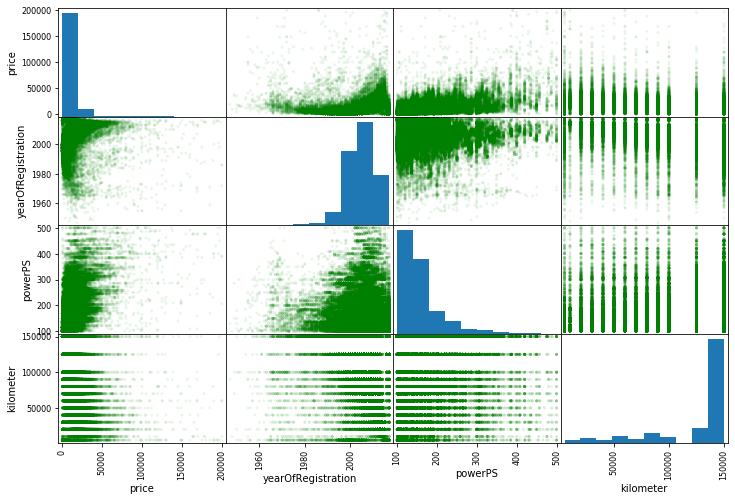

In [8]:
num_attir = ["price" , "yearOfRegistration" , "powerPS" , "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(cars_cl[num_attir],figsize=(12,8),alpha = 0.08,color='green')

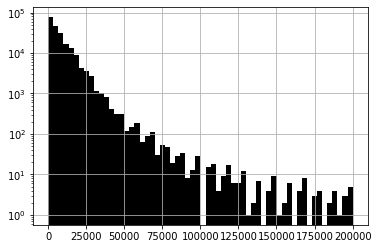

In [9]:
cars_cl["price"].hist(bins = 60, log = True,color='black')

In [10]:
cars_clean = data_frame.copy()

# Filtering the irrevelent data.

cars_clean = cars_clean[
    (cars_clean["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (cars_clean["powerPS"].between(100, 500, inclusive=True)) &
    (cars_clean["price"].between(100, 200000, inclusive=True)) &
    (cars_clean["offerType"] == "Angebot") 
]

# Replacing the empty/ NaN values in  the data.

cars_clean['vehicleType'].fillna(value='blank', inplace=True)
cars_clean['gearbox'].fillna(value='blank', inplace=True)
cars_clean['model'].fillna(value='blank', inplace=True)
cars_clean['fuelType'].fillna(value='blank', inplace=True)
cars_clean['notRepairedDamage'].fillna(value='blank', inplace=True)

# Change categorical attributes dtype to category

for col in cars_clean:
    if cars_clean[col].dtype == "object":
        cars_clean[col] = cars_clean[col].astype('category')
        
# Assign codes to categorical attribues instead of strings

cat_columns = cars_clean.select_dtypes(['category']).columns

cars_clean[cat_columns] = cars_clean[cat_columns].apply(lambda x: x.cat.codes)
        
    
# Dropping useless columns

drop_cols = ["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen"]

cars_clean = cars_clean.drop(drop_cols, axis=1)

In [11]:
cars_clean.head()

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,2136,1,0,18300,4,2011,2,190,50,125000,5,4,1,1,66954
2,56312,1,0,9800,8,2004,0,163,115,125000,8,4,14,0,90480
5,20652,1,0,650,7,1995,2,102,11,150000,10,1,2,1,33775
6,87933,1,0,2200,3,2004,2,109,8,150000,8,1,25,2,67112
8,44386,1,0,14500,2,2014,2,125,59,30000,8,1,10,0,94505


In [12]:
# Getting the train and test sets
train_set, test_set = train_test_split(cars_clean, test_size =0.2, random_state = 42)

# Separation of Features and Labels

cars_price = train_set["price"].copy()
cars = train_set.drop("price", axis=1)
#cars_price

In [13]:

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [14]:
# Setting categorical and numerical attributes

cat_attribs = ["name", "seller", "offerType", "vehicleType", "fuelType", "brand", "notRepairedDamage"]
num_attribs = list(cars.drop(cat_attribs, axis=1))

# Building the Pipelines

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])


In [15]:
cars_prepared = full_pipeline.fit_transform(cars)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared,cars_price)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_price, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
cars_predictions[0:4]

In [ ]:
list(cars_price[0:4])

In [ ]:
# Decision Tree Approach
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(cars_prepared, cars_price)

In [ ]:
cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(cars_price, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
# Random Forest Approach
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(cars_prepared, cars_price)

In [ ]:
cars_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(cars_price, cars_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
# Cross Validation

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# LinReg - CrossValidation
scores = cross_val_score(lin_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

In [ ]:
# Decision Tree - CrossValidation

scores = cross_val_score(tree_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

In [ ]:
#Random Forest- CrossValidation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=2)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

In [ ]:
# To see the importance of the features
feature_importances = forest_reg.feature_importances_
feature_importances

In [ ]:
cat_encoder = cat_pipeline.named_steps["encoder"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ cat_encoder
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
# Final Model
final_model = forest_reg

cars_test = test_set.drop("price", axis = 1)
cars_price_test = test_set["price"].copy()

cars_test_prepared = full_pipeline.transform(cars_test) ## call transform NOT fit_transform


from sklearn.metrics import mean_squared_error
final_predictions = final_model.predict(cars_test_prepared)

final_mse = mean_squared_error(cars_price_test, final_predictions)

final_rmse = np.sqrt(final_mse)
#to see the results.
#final_predictions